In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import matplotlib

In [40]:
# 5-12-2021:
df = pd.read_csv("../data_process/12-07-2021.csv", sep = '\t')

In [41]:

countries = ['Vietnam', 'USA', 'India', 'China', 'UK', 'Russia','Germany' ]
Asean_countries = ['Vietnam', 'Thailand', 'Malaysia', 'Philippines', 'Singapore', 'Myanmar']
bar_asean_countries= dict()
bar_countries = dict()
for i, country in enumerate(df['Country,Other']):
    if country in countries:
        bar_countries[country] = df['TotCases/1M pop'].iloc[i]
    if country in Asean_countries:
        bar_asean_countries[country] = df['TotCases/1M pop'].iloc[i]

## Việt Nam so với các nước khác ngày 7/12/2021

### So với các nước lớn

{'China': 69, 'USA': 150608, 'India': 24765, 'UK': 154399, 'Russia': 67556, 'Germany': 74503, 'Vietnam': 13566}


Text(0.5, 1.0, 'Total cases per 1M population, VN vs big countries 7-12-2021')

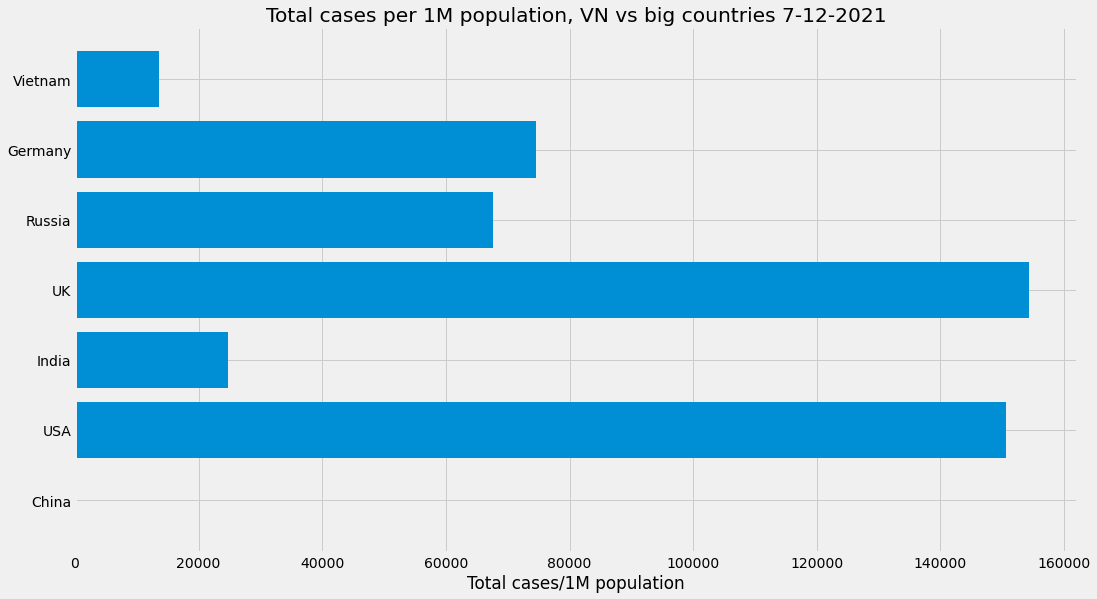

In [42]:
diff_country = list(bar_countries.keys())
count = list(bar_countries.values())
print(bar_countries)
plt.rcParams["figure.figsize"] = [16,9]
plt.barh(diff_country,  count)
plt.xlabel('Total cases/1M population')

plt.style.use('fivethirtyeight')

plt.title('Total cases per 1M population, VN vs big countries 7-12-2021')

### So với các nước trong khu vực

{'Philippines': 25390, 'Malaysia': 80948, 'Thailand': 30674, 'Vietnam': 13566, 'Myanmar': 9551, 'Singapore': 45737}


Text(0.5, 0, 'Total cases/1M population')

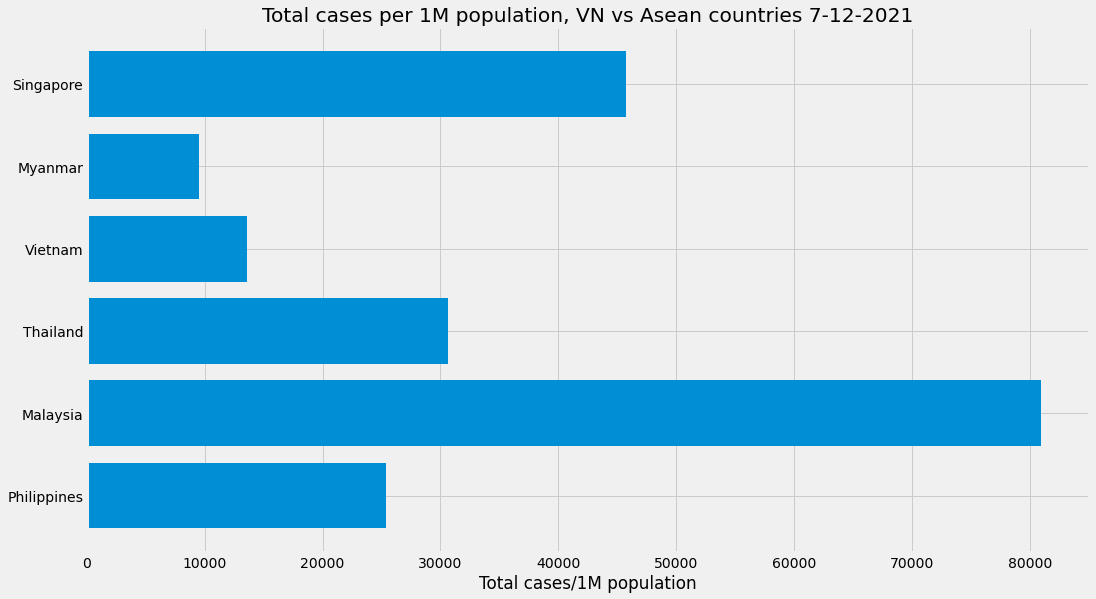

In [43]:
diff_country = list(bar_asean_countries.keys())
count = list(bar_asean_countries.values())
print(bar_asean_countries)
plt.title('Total cases per 1M population, VN vs Asean countries 7-12-2021')
plt.barh(diff_country,  count)
plt.xlabel('Total cases/1M population')

## Số liệu theo các ngày của thế giới

In [44]:
df_arr = {}
path = os.listdir("../data_process/")
for file in path:
    temp = pd.read_csv('../data_process/' + file, sep= '\t')
    df_arr[file] = temp
print(path)

['11-30-2021.csv', '12-01-2021.csv', '12-02-2021.csv', '12-03-2021.csv', '12-04-2021.csv', '12-05-2021.csv', '12-06-2021.csv', '12-07-2021.csv', '12-08-2021.csv', '12-09-2021.csv', '12-10-2021.csv', '12-11-2021.csv', '12-12-2021.csv']


In [45]:
arr = {}
for day in df_arr:
    temp= day.split('.')
    arr[temp[0]] = df_arr[day]['TotalCases'].iloc[7]

{'11-30-2021': 263057557, '12-01-2021': 263727823, '12-02-2021': 263987862, '12-03-2021': 265160308, '12-04-2021': 265690740, '12-05-2021': 266248319, '12-06-2021': 266775381, '12-07-2021': 267386792, '12-08-2021': 267630694, '12-09-2021': 268799300, '12-10-2021': 269468470, '12-11-2021': 269977768, '12-12-2021': 270011377}


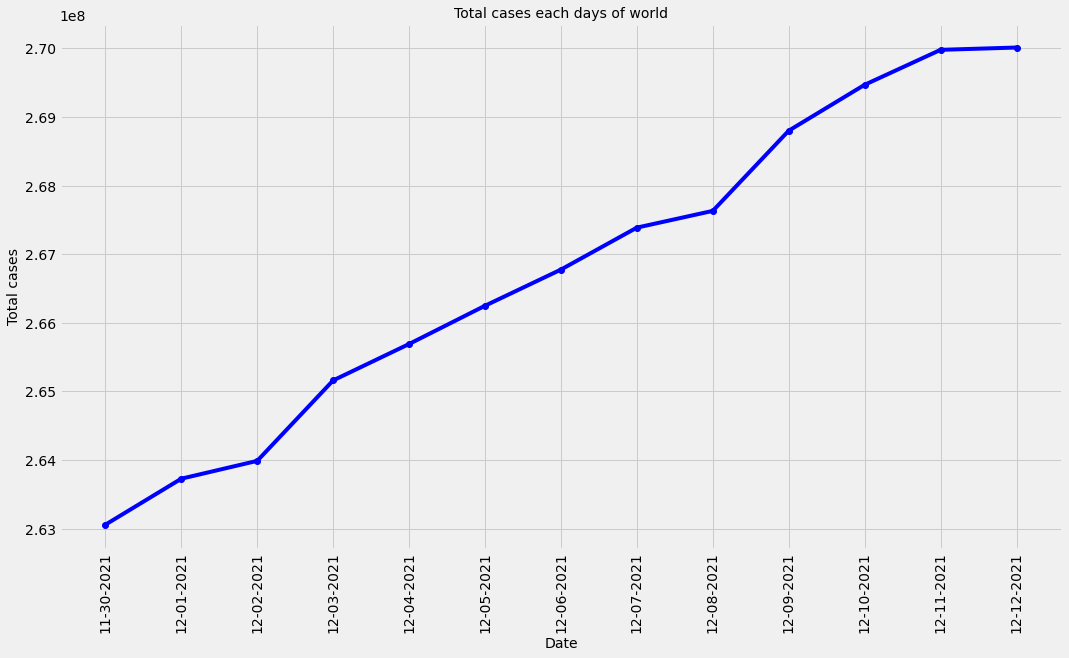

In [46]:
diff_date = list(arr.keys())
value_date = list(arr.values())
ax = plt.plot(diff_date, value_date, color='blue', marker='o')
ax = plt.title('Total cases each days of world', fontsize=14)
print(arr)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

### Số liệu theo các ngày của Việt Nam

In [47]:
vn_arr = {}
tt_death = {}
tt_recover = {}
infected = {}
for day in df_arr:
    vn_id = 0
    for i, country in enumerate(df_arr[day]['Country,Other']):
        if country == 'Vietnam':
            vn_id = i
    temp= day.split('.')
    vn_arr[temp[0]] = df_arr[day]['TotalCases'].iloc[vn_id]
    tt_death[temp[0]] = df_arr[day]['TotalDeaths'].iloc[vn_id]
    tt_recover[temp[0]] = df_arr[day]['TotalRecovered'].iloc[vn_id]
    infected[temp[0]] = df_arr[day]['TotalCases'].iloc[vn_id] - df_arr[day]['TotalDeaths'].iloc[vn_id] - df_arr[day]['TotalRecovered'].iloc[vn_id]


{'11-30-2021': 1238082, '12-01-2021': 1252590, '12-02-2021': 1266288, '12-03-2021': 1280780, '12-04-2021': 1294778, '12-05-2021': 1309092, '12-06-2021': 1323683, '12-07-2021': 1337523, '12-08-2021': 1352122, '12-09-2021': 1367433, '12-10-2021': 1382272, '12-11-2021': 1398413, '12-12-2021': 1398413}


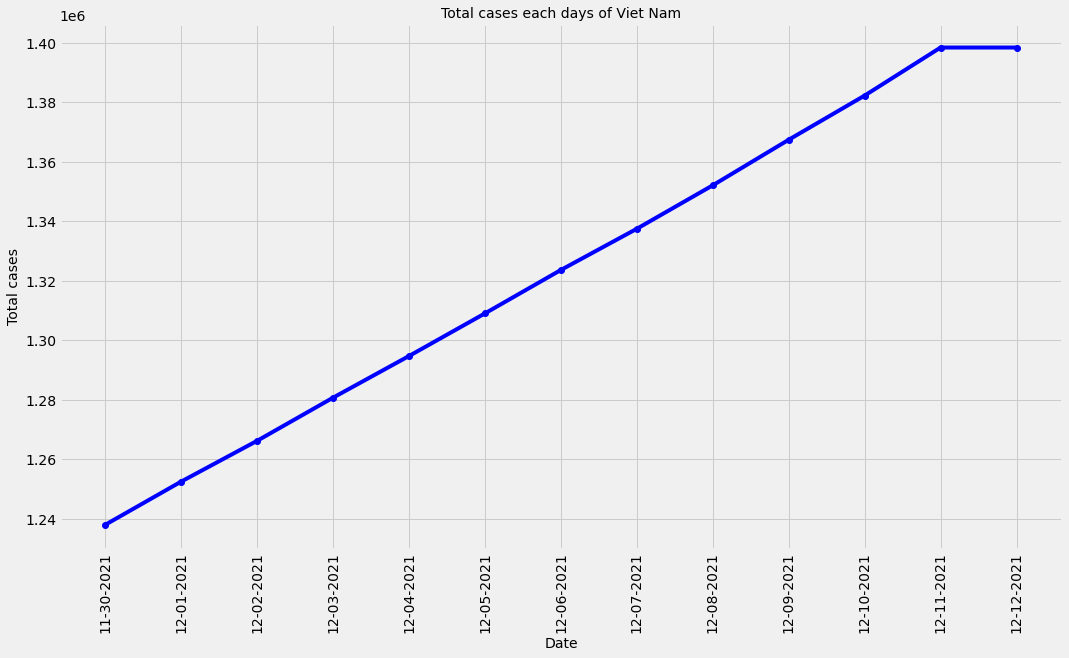

In [48]:
diff_date = list(vn_arr.keys())
value_date = list(vn_arr.values())
plt.plot(diff_date, value_date, color='blue', marker='o')
print(vn_arr)
plt.title('Total cases each days of Viet Nam', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.grid(True)
plt.xticks(rotation = 90)


plt.show()

### Cụ thể hơn, ta sẽ xem mối quan hệ của TotalDeaths và TotalRecovered theo các ngày của Việt Nam

death:  {'11-30-2021': 25252, '12-01-2021': 25448, '12-02-2021': 25658, '12-03-2021': 25858, '12-04-2021': 26061, '12-05-2021': 26260, '12-06-2021': 26483, '12-07-2021': 26700, '12-08-2021': 26930, '12-09-2021': 27186, '12-10-2021': 27402, '12-11-2021': 27611, '12-12-2021': 27611}
recover:  {'11-30-2021': 989348, '12-01-2021': 992052, '12-02-2021': 1005310, '12-03-2021': 1006459, '12-04-2021': 1007566, '12-05-2021': 1009277, '12-06-2021': 1010407, '12-07-2021': 1011656, '12-08-2021': 1036393, '12-09-2021': 1050979, '12-10-2021': 1052341, '12-11-2021': 1053425, '12-12-2021': 1053425}
infected:  {'11-30-2021': 223482, '12-01-2021': 235090, '12-02-2021': 235320, '12-03-2021': 248463, '12-04-2021': 261151, '12-05-2021': 273555, '12-06-2021': 286793, '12-07-2021': 299167, '12-08-2021': 288799, '12-09-2021': 289268, '12-10-2021': 302529, '12-11-2021': 317377, '12-12-2021': 317377}


C:\Users\HUUTUA~1\AppData\Local\Temp/ipykernel_8876/3074160525.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = diff_date, rotation = 90)


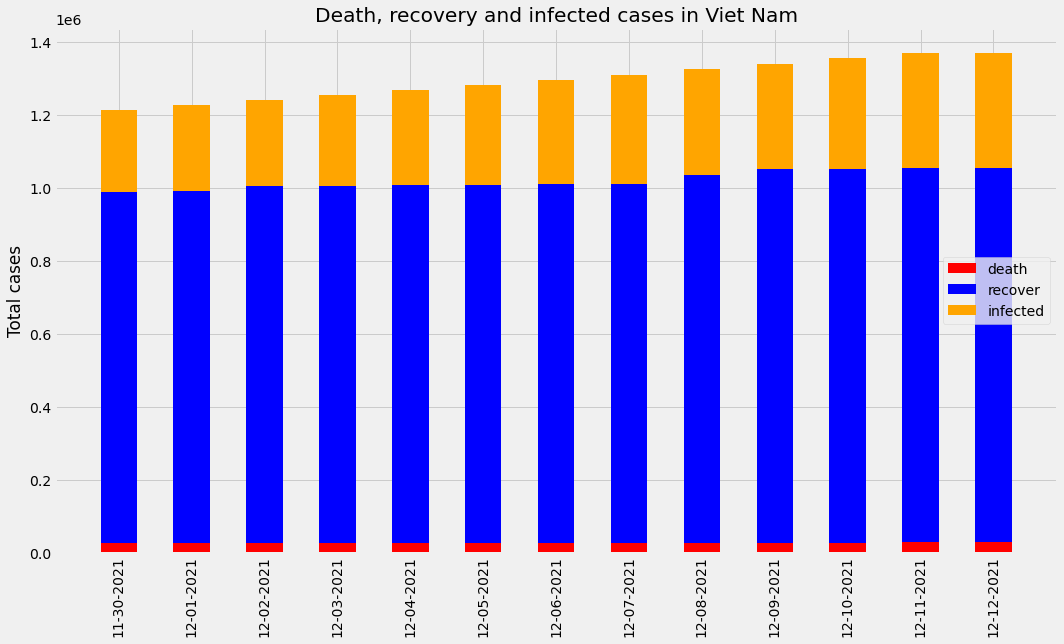

In [49]:
diff_date = list(vn_arr.keys())
value_date = list(vn_arr.values())
death_date = list(tt_death.values())
recover_date = list(tt_recover.values())
infected_date = list(infected.values())
width = 0.5

fig, ax = plt.subplots()

print('death: ', tt_death)
print('recover: ', tt_recover)
print('infected: ', infected)
ax.bar(diff_date, death_date, width, label='death', color = 'r')
ax.bar(diff_date, recover_date, width, bottom=death_date,
       label='recover', color = 'b')
ax.bar(diff_date, infected_date, width, bottom=recover_date,
       label='infected', color = 'orange')  

ax.set_xticklabels(labels = diff_date, rotation = 90)
ax.set_ylabel('Total cases')
ax.set_title('Death, recovery and infected cases in Viet Nam')

ax.legend(loc ="center right")

plt.show()



### Cụ  thể hơn, ta có thể quan sát pie chart dưới đây để thấy rõ hơn đối với 1 ngày cụ thể

('Death', 'Recover', 'Infected') [2.0396064234840665, 79.90973134251205, 18.050662234003887]


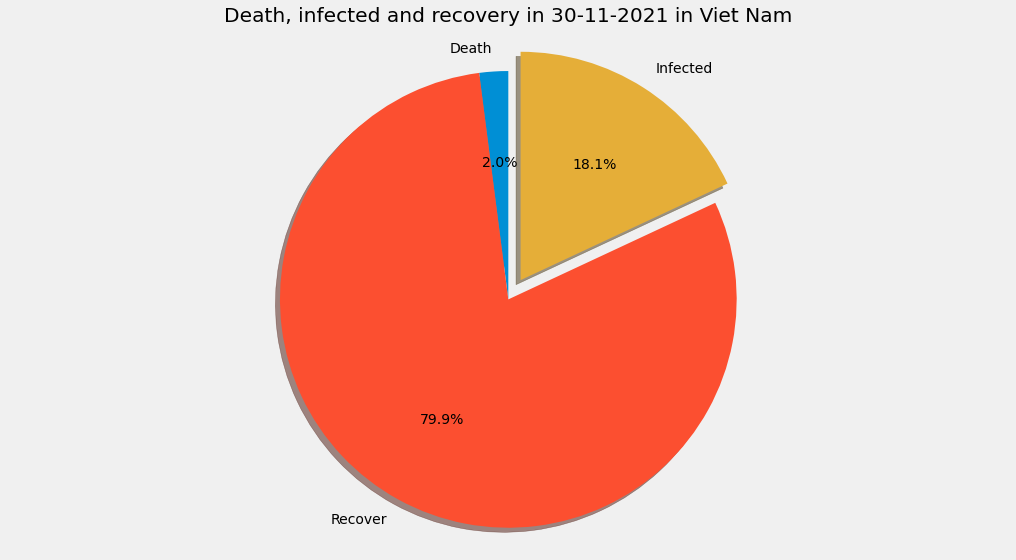

In [50]:
#30-11-2021
labels = 'Death', 'Recover', 'Infected'
sizes = [death_date[0]/value_date[0]*100, recover_date[0]/value_date[0]*100, infected_date[0]/value_date[0]*100]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
print(labels, sizes)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Death, infected and recovery in 30-11-2021 in Viet Nam")

plt.show()

('Death', 'Recover', 'Infected') [1.996227354595024, 75.63653111011924, 22.367241535285746]


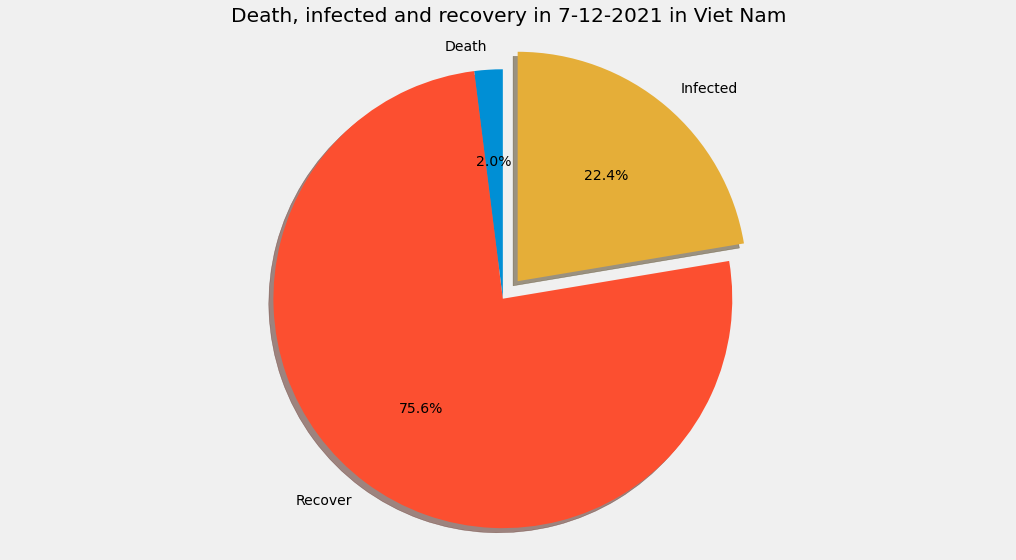

In [51]:
labels = 'Death', 'Recover', 'Infected'
sizes = [death_date[7]/value_date[7]*100, recover_date[7]/value_date[7]*100, infected_date[7]/value_date[7]*100]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
print(labels, sizes)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Death, infected and recovery in 7-12-2021 in Viet Nam")

plt.show()

### Các châu lục so với nhau theo ngày 8/12/2021, đối với các ca mắc mới

In [52]:

continents = ['Asia', 'North America', 'South America', 'Europe', 'Africa', 'Oceania']
bar_continents = dict()
for i, continent in enumerate(df['Country,Other']):
    if continent in continents:
        bar_continents[continent] = df['NewCases'].iloc[i]

{'Asia': 84709, 'North America': 113810, 'South America': 19766, 'Europe': 367768, 'Africa': 23708, 'Oceania': 1650}


Text(0.5, 0, 'Total cases')

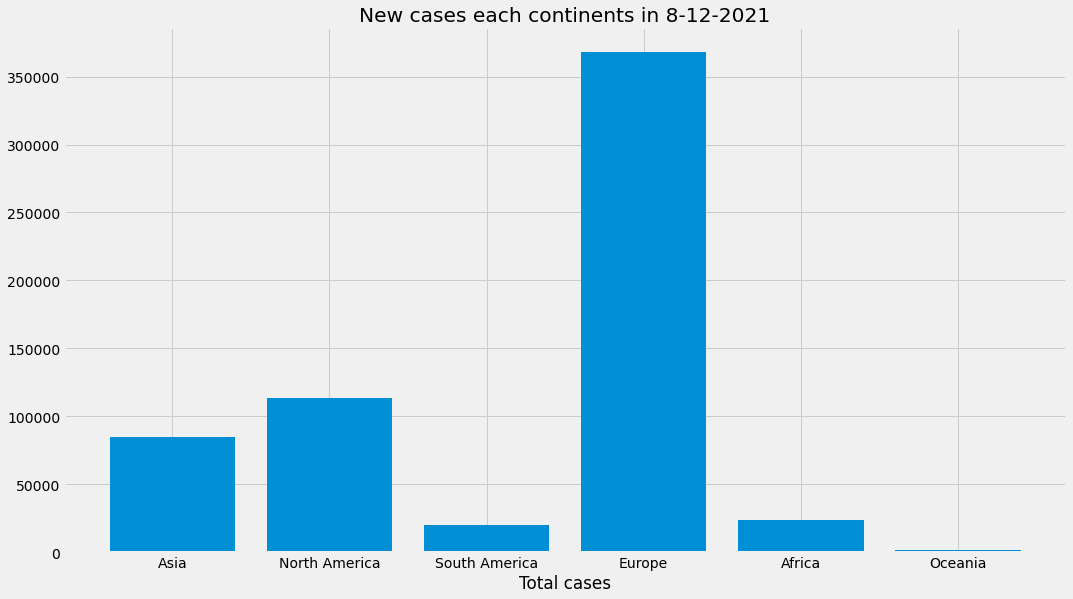

In [53]:
diff_continent = list(bar_continents.keys())
count_continent = list(bar_continents.values())

continent_chart = plt.bar(diff_continent,  count_continent)
print(bar_continents)
plt.title('New cases each continents in 8-12-2021')
plt.xlabel('Total cases')


### Các châu lục so với nhau theo ngày 8/12/2021, đối với các tử vong mới

{'Asia': 1196, 'North America': 1908, 'South America': 428, 'Europe': 4294, 'Africa': 134, 'Oceania': 32}


Text(0.5, 0, 'Total cases')

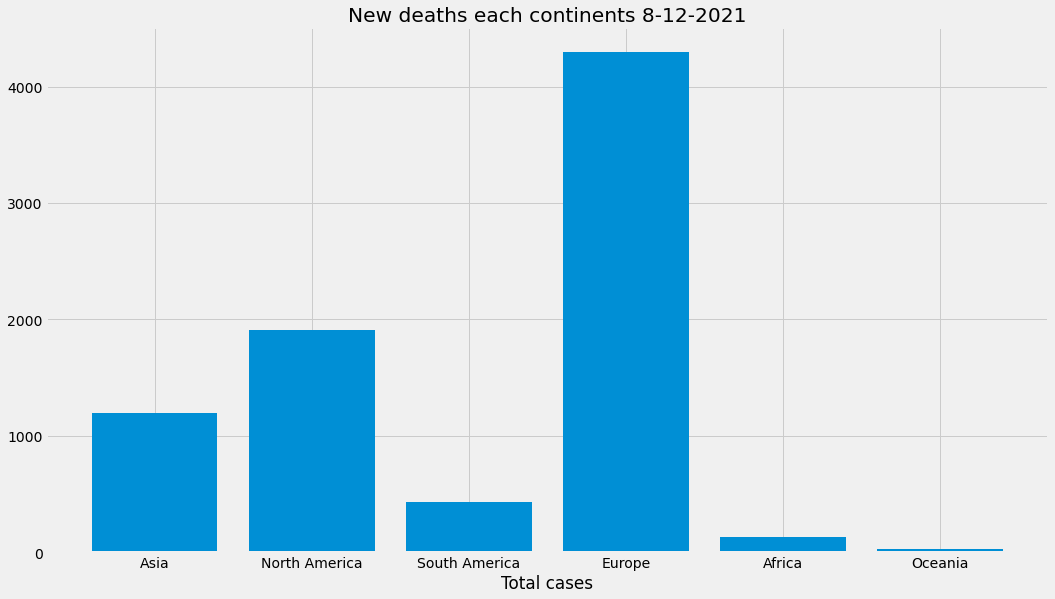

In [54]:
death_continents = dict()
for i, continent in enumerate(df['Country,Other']):
    if continent in continents:
        bar_continents[continent] = df['NewDeaths'].iloc[i]
diff_continent = list(bar_continents.keys())
count_continent = list(bar_continents.values())

continent_chart = plt.bar(diff_continent,  count_continent)
print(bar_continents)
plt.title('New deaths each continents 8-12-2021')
plt.xlabel('Total cases')

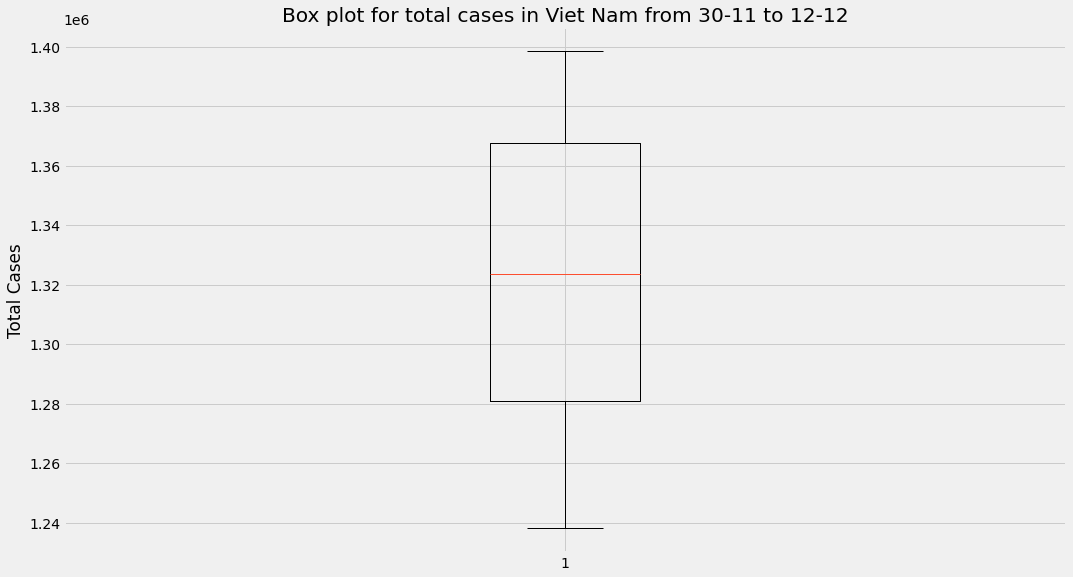

In [58]:
plt.title('Box plot for total cases in Viet Nam from 30-11 to 12-12')
# Creating plot
plt.boxplot(value_date)
plt.ylabel('Total Cases')
 
# show plot
plt.show()

In [60]:
median = np.median(value_date)
upper_quartile = np.percentile(value_date, 75)
lower_quartile = np.percentile(value_date, 25)
print('Median: ', median)
print('Upper quartile: ' , upper_quartile)
print('Lower quartile: ', lower_quartile)


Median:  1323683.0
Upper quartile:  1367433.0
Lower quartile:  1280780.0
